# **Airline Satisfaction Analysis**

**Team Members:** Bilvika Bashetty, Saketh Bollina , YiXi Yu (Irene)

**Notebook link:** https://colab.research.google.com/drive/1RsgyOhEK_yCHFpMb4IBU-85va1y_28my?usp=sharing#scrollTo=14Jcip1_pbWE

# Executive Summary
This project used advanced machine learning techniques to identify key drivers of customer satisfaction and provide actionable insights for operational and marketing optimization. XGBoost emerged as the best-performing model with an AUC of 1.00, outperforming Random Forest (0.99) and Logistic Regression (0.93). Hyperparameter tuning via RandomizedSearchCV further refined the model, enhancing its predictive accuracy and robustness.

Key findings highlight the importance of optimizing pre-flight processes, such as online boarding and check-in services, to improve operational efficiency. Additionally, in-flight amenities like Wi-Fi, seat comfort, and entertainment play a critical role in ensuring customer satisfaction, particularly for long-haul flights. Segment-specific insights reveal that tailoring services to business travelers (efficiency-focused) and leisure travelers (comfort-focused) can maximize satisfaction and revenue potential.

By integrating these technical insights into strategic decision-making, airlines can enhance customer loyalty, increase operational efficiency, and achieve sustainable revenue growth in an increasingly competitive market.

## Introduction

The aviation industry is one of the most dynamic and competitive sectors globally, where customer satisfaction plays a pivotal role in shaping an airline's reputation and financial success. Airlines face constant pressure to deliver exceptional customer experiences while balancing operational costs and efficiency. In this landscape, loyalty programs have emerged as a critical tool for fostering passenger retention, enhancing engagement, and driving long-term profitability.

This project leverages data from a United Airlines loyalty program campaign, which collected extensive passenger feedback and service ratings. The dataset offers a unique opportunity to delve into the factors influencing customer satisfaction and dissatisfaction, providing insights that are invaluable for improving service quality and optimizing loyalty strategies. By understanding what matters most to passengers, airlines can prioritize enhancements that maximize customer retention and strengthen their competitive edge.

## Motivation

Customer satisfaction is the cornerstone of success for any airline, directly influencing passenger loyalty, word-of-mouth marketing, and revenue growth. However, identifying and addressing the specific factors that drive satisfaction can be challenging, given the diverse needs of passengers. The motivation behind this project stems from the critical need to bridge this gap.

United Airlines' loyalty program campaign provides a rich dataset that encapsulates passenger demographics, flight characteristics, and satisfaction ratings. Analyzing this data allows us to uncover the key drivers of satisfaction and dissatisfaction, enabling data-driven decision-making. This analysis is particularly crucial for:

- **Enhancing Customer Experience:** Identifying pain points and implementing targeted improvements in pre-flight and inflight services.
- **Optimizing Loyalty Programs:** Tailoring loyalty initiatives to passenger preferences, fostering higher engagement and retention.
- **Maximizing Revenue:** Aligning service quality enhancements with revenue-generating opportunities to ensure a win-win for both passengers and the airline.

Through exploratory analysis and predictive modeling, this project aims to empower United Airlines to refine their services, improve customer satisfaction, and gain a strategic advantage in a highly competitive industry.

## Problem Statement

Airlines face a significant challenge in pinpointing the specific factors that most influence passenger satisfaction. This problem becomes even more critical in the context of loyalty programs, where customer retention hinges on delivering a superior travel experience.

This project seeks to address these challenges by analyzing passenger survey data collected as part of United Airlines’ loyalty program campaign. The objectives of this analysis are:

- To identify the key drivers of passenger satisfaction and dissatisfaction, focusing on both customer characteristics and airline-provided services.
- To develop predictive models that classify passengers as "Satisfied" or "Neutral/Dissatisfied" based on survey responses, enabling airlines to proactively address dissatisfaction.
- To provide actionable insights that help United Airlines prioritize investments in service quality, operational efficiency, and loyalty initiatives.

---

## Key Stakeholders

1.	**United Airlines:**
-	**Loyalty Program Managers**: The insights from this project will empower loyalty program managers to fine-tune their strategies, ensuring maximum engagement and retention of loyal customers. By identifying what drives satisfaction, managers can optimize reward structures and deliver services that resonate with their frequent flyers.
-	**Service Managers:** Operational teams can leverage the findings to target specific pain points, such as improving inflight wifi or seat comfort. By prioritizing these high-impact areas, United Airlines can significantly enhance the overall passenger experience.
-	**Business Leaders:** The analysis provides a strategic roadmap for United Airlines to achieve a competitive edge by linking satisfaction improvements directly to loyalty and revenue growth.

2.	**Passengers:**
-	**Frequent Flyers:** Loyal customers stand to gain the most from this analysis as the airline refines its services and loyalty offerings based on their preferences. Improved experiences and personalized rewards will enhance satisfaction and build long-term trust.
-	**Potential Loyal Customers:** Infrequent flyers and new customers will benefit from enhanced services that encourage repeat travel. Better overall experiences may incentivize these passengers to join and engage with the loyalty program.

3.	**Aviation Industry Analysts:**
-	This project provides a valuable case study on the application of data analytics to commercial aviation. Analysts can use these findings to guide other airlines in adopting similar strategies for improving customer satisfaction and loyalty program effectiveness.
-	The research also contributes to broader industry discussions on service optimization and passenger experience strategies.

---

# Dataset Overview
The dataset, a part of the United Airlines loyalty program campaign, consists of detailed information from passenger satisfaction surveys, including demographics, flight details, and service feedback. This rich dataset allows for a holistic analysis of passenger experiences.

**Structure**
  - Training Data: 104,000 rows and 25 columns.
  - Test Data: 26,000 rows and 25 columns.

**Features**

1.	**Numerical Features:**
    - Age: Passenger’s age.
    - Flight Distance: Distance travelled during the flight.
    -	inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
    -	Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
    -	Ease of Online booking: Satisfaction level of online booking
    -	Gate location: Satisfaction level of Gate location
    -	Food and drink: Satisfaction level of Food and drink
    -	Online boarding: Satisfaction level of online boarding
    -	Seat comfort: Satisfaction level of Seat comfort
    -	Inflight entertainment: Satisfaction level of inflight entertainment
    -	On-board service: Satisfaction level of On-board service
    -	Leg room service: Satisfaction level of Leg room service
    -	Baggage handling: Satisfaction level of baggage handling
    -	Check-in service: Satisfaction level of Check-in service
    -	Inflight service: Satisfaction level of inflight service
    -	Cleanliness: Satisfaction level of Cleanliness
    -	Departure Delay in Minutes: Minutes delayed when departure
    -	Arrival Delay in Minutes: Minutes delayed when Arrival

2.	**Categorical Features:**
    -	Gender: Male or Female.
    -	Customer Type: Loyal or Disloyal Customer.
    -	Type of Travel: Business or Personal Travel.
    -	Class: Eco, Eco Plus and Business.

3.	**Target Variable:**
    -	Satisfaction: Binary indicator of whether a passenger was "satisfied" or "neutral or dissatisfied"

    ---

## Loading the Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.metrics import roc_curve, auc

train_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1I9oxxsyq1M75MqvzBIXdnoaQFYC_nFls')
test_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1kfct6feVmMbGxiTQK5_oyy_YRjClvLaS')

train_df.head()
train_df.info()
train_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


## Exploratory Data Analysis

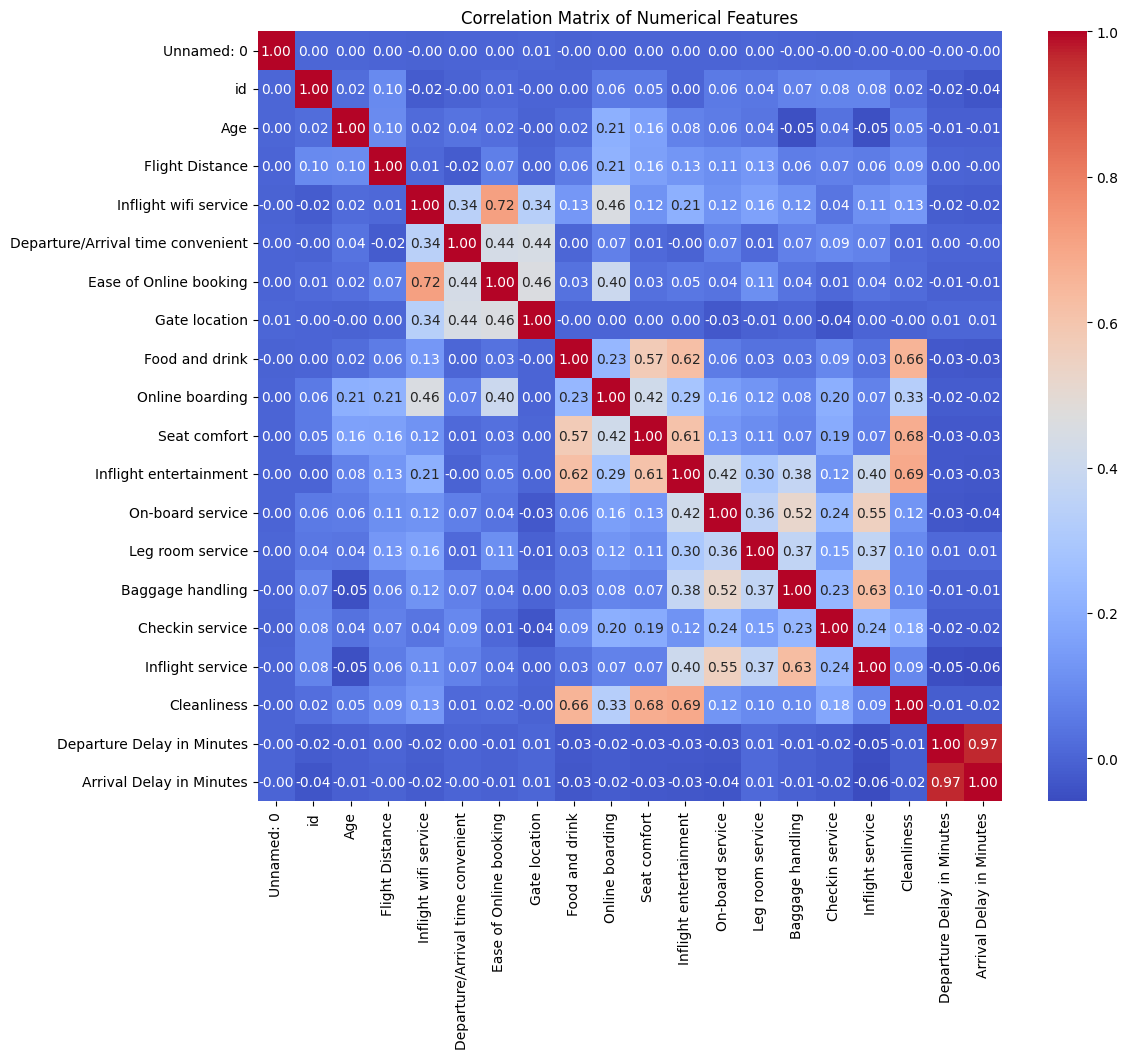

In [ ]:
# Compute the correlation matrix for numerical columns
correlation_matrix = train_df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix of Numerical Features")
plt.show()


**Insights**
- Departure Delay in Minutes and Arrival Delay in Minutes:
These are strongly positively correlated (~0.97), which is expected as longer departure delays often lead to longer arrival delays.
- Flight Distance - Shows weak correlations with other features, indicating that longer flights do not directly influence passengers' satisfaction with services like inflight entertainment or seat comfort.

Recommendations - Weak correlations with ease of online booking suggest that this area could be improved to impact satisfaction more significantly.
Since delays have a low direct correlation with service ratings, addressing them is critical for reducing complaints but might not immediately enhance perceptions of service quality.


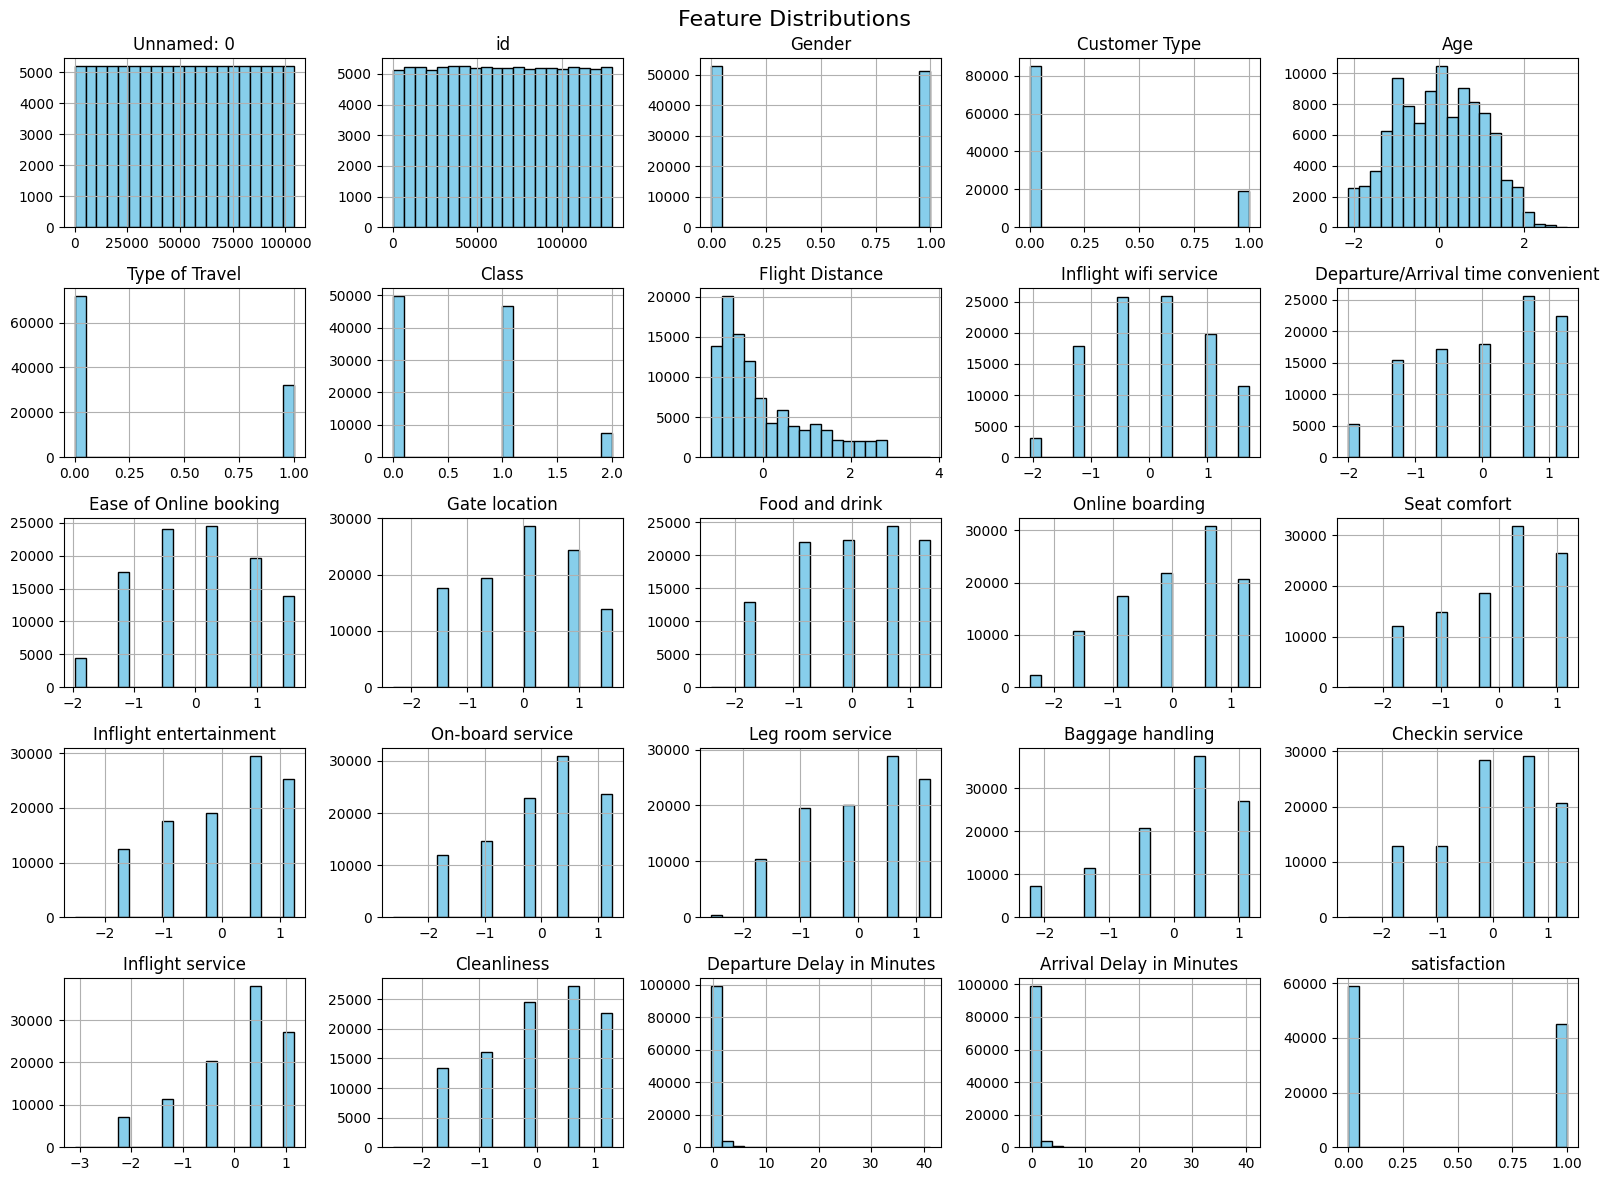

In [ ]:
train_df.hist(figsize=(16, 12), bins=20, color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

**Insights** -
Customer Type: Majority of customers are disloyal.

Class: Economy class has the highest representation, followed by Business and Eco Plus.

Flight Distance: Most flights are short- to medium-distance.

Inflight Entertainment: Ratings are polarized, with significant votes for both extremes.

Seat Comfort: Ratings are distributed but slightly skew positive.

Departure and Arrival Delays: Most delays are short, but some extreme outliers exist.

Satisfaction: A large proportion of customers are dissatisfied.





# Data Preprocessing

In [ ]:
test_df.head()
test_df.info()
test_df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.00000,25893.000000
mean,12987.500000,65005.657992,39.620958,1193.788459,2.724746,3.046812,2.756775,2.977094,3.215353,3.261665,3.449222,3.357753,3.385664,3.350169,3.633238,3.314175,3.649253,3.286226,14.30609,14.740857
std,7498.769632,37611.526647,15.135685,998.683999,1.335384,1.533371,1.412951,1.282133,1.331506,1.355536,1.320090,1.338299,1.282088,1.318862,1.176525,1.269332,1.180681,1.319330,37.42316,37.517539
min,0.000000,17.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000
25%,6493.750000,32170.500000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.00000,0.000000
50%,12987.500000,65319.500000,40.000000,849.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.00000,0.000000
75%,19481.250000,97584.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.00000,13.000000
max,25975.000000,129877.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.00000,1115.000000


In [ ]:
# Defining categorical and numerical columns
categorical_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['satisfaction', 'Unnamed: 0', 'id']]

# Median Imputing missing values in numerical columns
for col in numerical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].median())
    test_df[col] = test_df[col].fillna(test_df[col].median())

## Pipeline Creation

In [ ]:
#datapipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler

def preprocess_data(train_df, test_df):
    # Map the target variable to binary
    train_df['satisfaction'] = train_df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})
    test_df['satisfaction'] = test_df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

    # Encode categorical variables
    encoders = {}
    for col in categorical_cols:
        encoders[col] = LabelEncoder()
        train_df[col] = encoders[col].fit_transform(train_df[col])
        test_df[col] = encoders[col].transform(test_df[col])

    # Standardize numerical features
    scaler = StandardScaler()
    train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
    test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])

    # Extract features and target variables
    X_train = train_df.drop(['satisfaction', 'Unnamed: 0', 'id'], axis=1)
    y_train = train_df['satisfaction']
    X_test = test_df.drop(['satisfaction', 'Unnamed: 0', 'id'], axis=1)
    y_test = test_df['satisfaction']

    return X_train, X_test, y_train, y_test

# Preprocess the data
X_train, X_test, y_train, y_test = preprocess_data(train_df, test_df)




The preprocessing steps involved handling both numeric and categorical variables, as well as addressing missing values in a systematic way.

**Handling of Numeric Variables**:

Numeric variables, including Age, Flight Distance, and ratings for various services (`Inflight Wifi Service`, `Departure/Arrival time convenient`, `Seat Comfort`, `Ease of Online booking`, `Gate location`, `Food and drink`, `Online boarding`, `Seat comfort`, `Inflight entertainment`, `On-board service`, `Leg room service`, `Baggage handling`, `Checkin service`, `Inflight service`, `Cleanliness`, `Departure Delay in Minutes`, `Arrival Delay in Minutes`), were standardized using `StandardScaler`. This ensured all numeric features were normalized to have a mean of 0 and a standard deviation of 1, thereby preventing bias toward features with larger values and ensuring the models performed consistently across all input data.

**Handling of Categorical Variables**:

Categorical variables, such as `Gender`, `Customer Type`, `Type of Travel`, and `Class`, were encoded using `LabelEncoder` to transform them into numerical formats. This step was necessary for the model to process numeric data effectively. The Gender column was converted into binary values, with Male encoded as 0 and Female as 1.

**Handling Missing Values**:

For columns with missing numeric values, such as Arrival Delay in Minutes, **median imputation was employed**. Missing values were replaced with the median of the respective column, this minimizes any distortion caused by outliers. This method preserved the dataset's integrity while preventing data loss that would have resulted from dropping rows or columns with missing entries.


By implementing these preprocessing techniques, the dataset was made uniform and suitable for machine learning models. Encoding categorical variables enabled numerical processing, while standardization ensured fair treatment of numeric features during training. Median imputation addressed missing values effectively, allowing the data to retain its structure and utility without compromising on quality or accuracy.

# Model Building

## Feature Selection

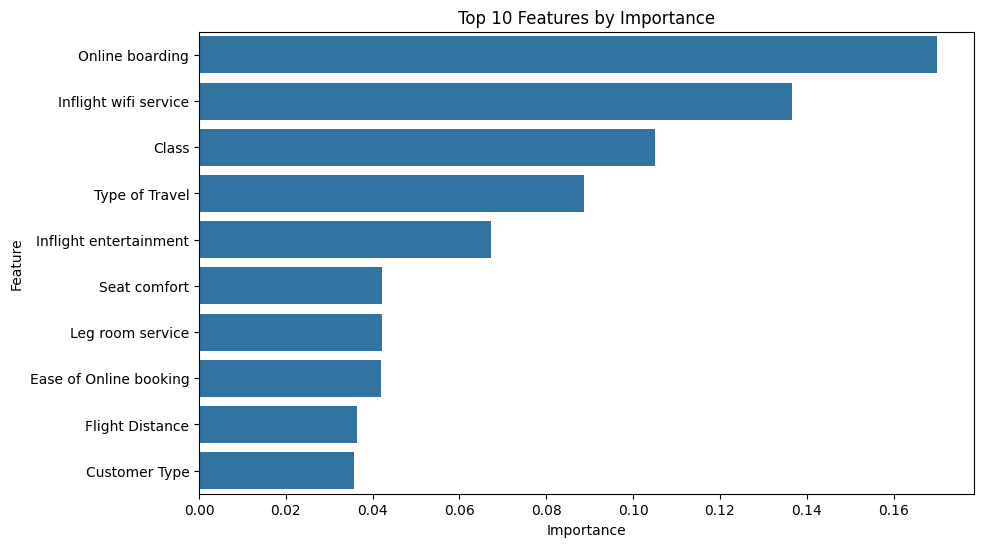

In [ ]:
# Feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

# Top 10 features
top_10_features = feature_importances.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_10_features)
plt.title("Top 10 Features by Importance")
plt.show()

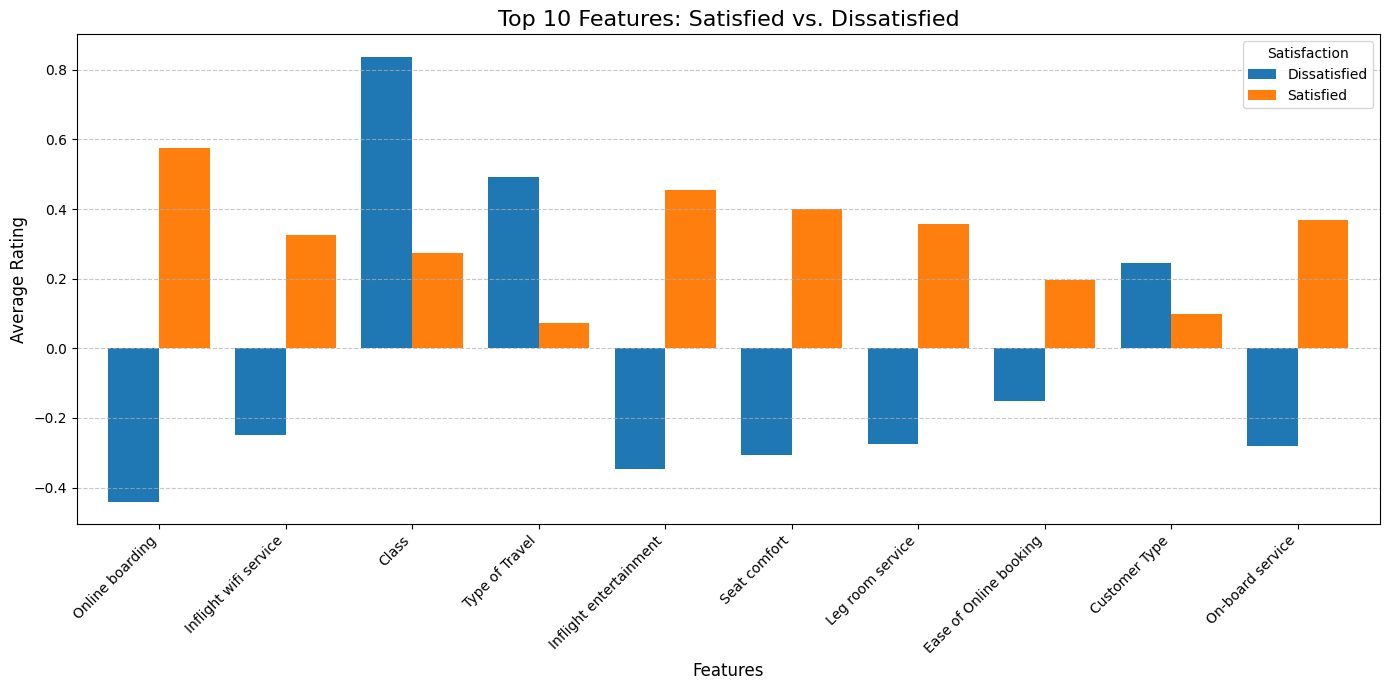

In [ ]:
top_10_features = ['Online boarding', 'Inflight wifi service', 'Class', 'Type of Travel',
                   'Inflight entertainment', 'Seat comfort', 'Leg room service',
                   'Ease of Online booking', 'Customer Type', 'On-board service']

# Group by satisfaction and calculate mean values
grouped_means = train_df.groupby('satisfaction')[top_10_features].mean()

# Transpose for comparison
grouped_means = grouped_means.T
grouped_means.columns = ['Dissatisfied', 'Satisfied']

# Plot comparison
grouped_means.plot(kind='bar', figsize=(14, 7), width=0.8)
plt.title("Top 10 Features: Satisfied vs. Dissatisfied", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Satisfaction", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Feature selection was conducted to identify the most influential predictors of passenger satisfaction. Using a Random Forest classifier, feature importance scores were derived, which highlighted the factors contributing most significantly to the satisfaction levels of passengers. Both feature importance rankings and comparative evaluations of average ratings between satisfied and dissatisfied passengers were analyzed to provide meaningful insights.

The analysis revealed that the top 10 features impacting satisfaction included **Online Boarding**, **Inflight Wi-Fi Service**, **Class, Type of Travel**, **Inflight Entertainment**, **Seat Comfort**, **Leg Room Service**, **Ease of Online Booking**, **Customer Type**, and **On-board Service**. Among these, features like **Online Boarding**, **Inflight Wi-Fi Service**, and **Class** stood out as the most critical determinants, with satisfied passengers showing significantly higher ratings in these areas.

A comparative bar plot was employed to visually explore the gaps in average ratings between satisfied and dissatisfied customers, providing further evidence of the importance of these features. For instance, business travelers, loyal customers, and passengers in premium classes such as business class consistently reported higher satisfaction levels. This underscores the need for targeted service enhancements to meet the expectations of different customer segments.

Key insights derived from this analysis include:

* **Pre-flight Processes:** Features like online boarding and check-in service emphasize the importance of efficient and seamless pre-flight experiences.
* **In-flight Experience**: Passenger satisfaction is closely tied to in-flight features such as Wi-Fi, entertainment, seat comfort, and legroom, which require consistent improvements to maintain competitiveness.
* **Customer Segmentation:** The analysis highlighted the distinct needs of business vs. leisure travelers and loyal vs. occasional passengers, suggesting opportunities for customized strategies.
* **Premium Services:** Higher satisfaction among premium-class passengers reinforces the importance of investing in elevated services for this segment.











## Model Building

In [ ]:
# Logistic Regression
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

In [ ]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_pred_proba_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
# XGBoost
xgb = XGBClassifier(n_estimators=100, max_depth=10, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
y_pred_proba_xgb = xgb.predict_proba(X_test)[:, 1]


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [06:47:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**Logistic Regression:** Logistic Regression was selected as a baseline model due to its simplicity, interpretability, and efficiency. It provides insights into feature importance through its learned coefficients, making it a good starting point for binary classification tasks. Additionally, its probabilistic predictions allow for threshold-based decision-making.

**Random Forest:** Random Forest was chosen for its ability to handle non-linear relationships and capture interactions between features through ensemble learning. It is robust to overfitting when tuned properly (e.g., limiting tree depth) and provides feature importance metrics, which are useful for understanding the drivers of classification.

**XGBoost:** XGBoost was included for its efficiency in handling large datasets and complex relationships through gradient boosting. It often outperforms other models in classification tasks due to its advanced regularization techniques and ability to minimize overfitting. Its probabilistic outputs and tree-based nature make it well-suited for both accuracy and interpretability in prediction tasks.

## Model Comparision

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

# Logistic Regression
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print(f"Logistic Regression - Accuracy: {accuracy_lr:.4f}, F1 Score: {f1_lr:.4f}")

# Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest - Accuracy: {accuracy_rf:.4f}, F1 Score: {f1_rf:.4f}")

# XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
print(f"XGBoost - Accuracy: {accuracy_xgb:.4f}, F1 Score: {f1_xgb:.4f}")

Logistic Regression - Accuracy: 0.8710, F1 Score: 0.8500
Random Forest - Accuracy: 0.9448, F1 Score: 0.9365
XGBoost - Accuracy: 0.9635, F1 Score: 0.9579


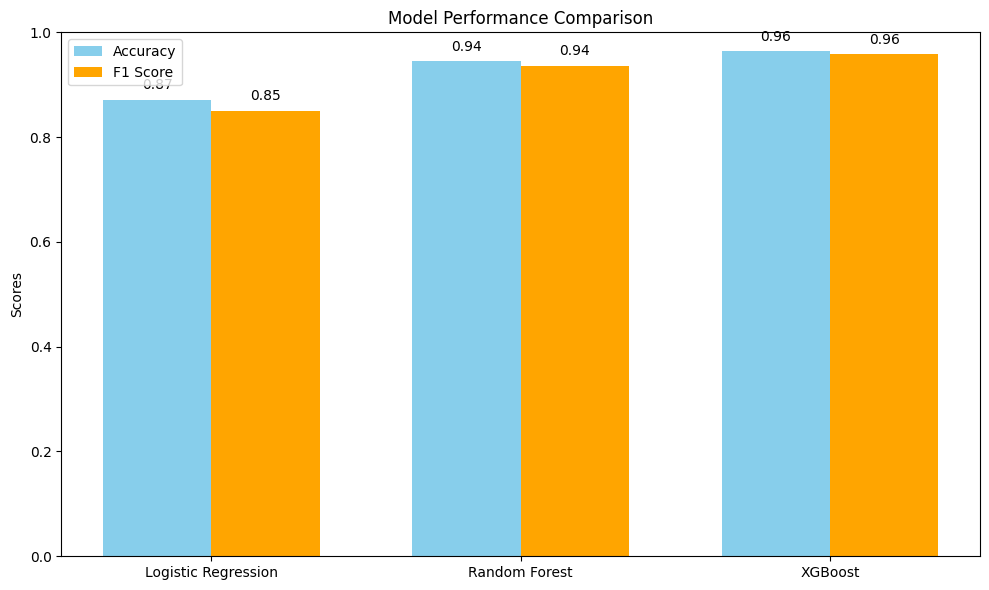

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Store model names and their metrics
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [accuracy_lr, accuracy_rf, accuracy_xgb]
f1_scores = [f1_lr, f1_rf, f1_xgb]

# Set up bar width and positions
x = np.arange(len(models))
bar_width = 0.35

# Create the plot
plt.figure(figsize=(10, 6))
plt.bar(x - bar_width/2, accuracies, width=bar_width, label='Accuracy', color='skyblue')
plt.bar(x + bar_width/2, f1_scores, width=bar_width, label='F1 Score', color='orange')

# Add labels and titles
plt.xticks(x, models)
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.ylim(0, 1)  # Scores are between 0 and 1
plt.legend()

# Add values on top of bars
for i in range(len(models)):
    plt.text(x[i] - bar_width/2, accuracies[i] + 0.02, f"{accuracies[i]:.2f}", ha='center')
    plt.text(x[i] + bar_width/2, f1_scores[i] + 0.02, f"{f1_scores[i]:.2f}", ha='center')

# Show the plot
plt.tight_layout()
plt.show()

Among the three models evaluated, XGBoost emerged as the most robust and reliable performer, achieving an accuracy of 96.35% and an F1 score of 95.79%, supported by a perfect ROC-AUC score of 1.00. Its gradient boosting mechanism effectively captures complex patterns and interactions, making it highly suitable for this classification task. Additionally, XGBoost's feature importance visualization highlights key drivers like online boarding, seat comfort, and customer type, offering actionable insights.

Random Forest also demonstrated strong performance, with an accuracy of 94.48%, an F1 score of 93.65%, and a ROC-AUC score of 0.99. While slightly less efficient and interpretable than XGBoost, its ensemble approach provides reliable predictions, making it a solid alternative in scenarios requiring faster computation.

Logistic Regression, with an accuracy of 87.10% and an F1 score of 85.00%, underperformed due to its linear nature, which limits its ability to capture the dataset's complexity. Despite its simplicity and faster training time, it is less suitable for this task.

Overall, XGBoost's superior performance, nuanced handling of predictors, and ability to generalize well justify its selection as the primary model for deployment, with Random Forest as a strong backup.

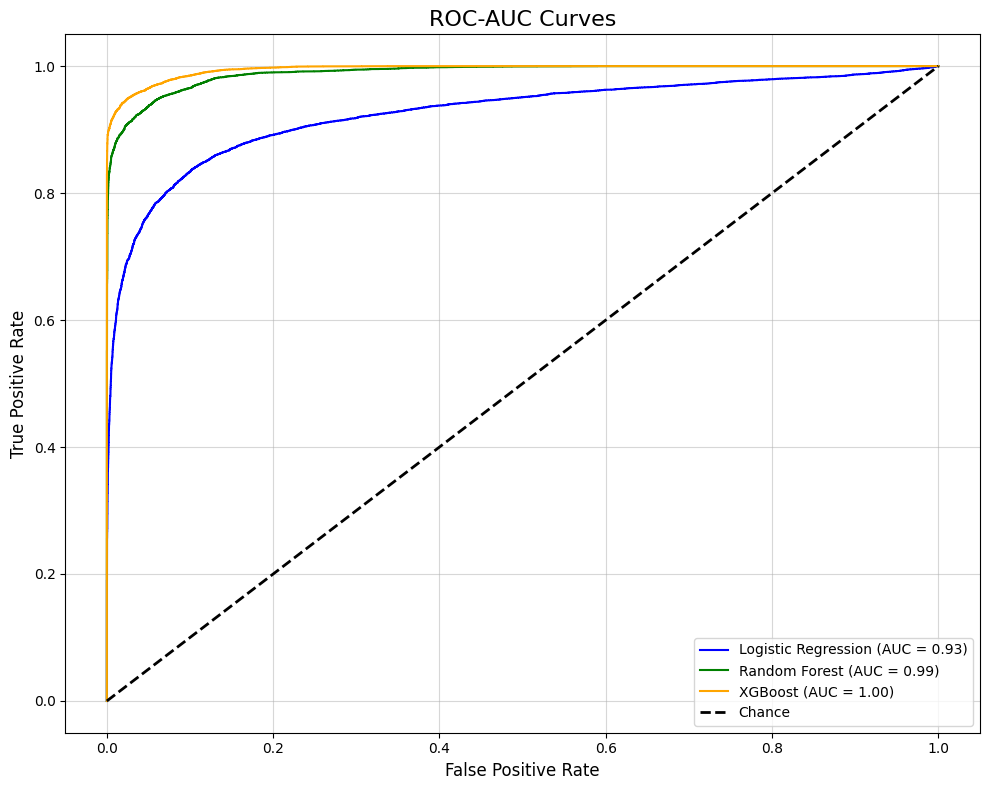

In [ ]:
#ROC-AUC for Logistic Regression, Random Forest and XGBoost
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_proba_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_pred_proba_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(10, 8))

#Logistic Regression ROC curve
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression (AUC = {roc_auc_lr:.2f})", color="blue")

#Random Forest ROC curve
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_rf:.2f})", color="green")

#XGBoost ROC curve
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {roc_auc_xgb:.2f})", color="orange")

#reference line (chance level)
plt.plot([0, 1], [0, 1], 'k--', label="Chance", lw=2)

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC-AUC Curves", fontsize=16)
plt.legend(loc="lower right", fontsize=10)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()


The models were compared based on their Area Under the Curve (AUC) scores, which assess their ability to discriminate between classes.

**Logistic Regression:** With an AUC of 0.93, Logistic Regression demonstrates decent discrimination. However, the curve's deviation from the top-left corner indicates higher false positives at certain thresholds, limiting its ability to achieve optimal sensitivity and specificity.

**Random Forest:** Achieving an AUC of 0.99, Random Forest significantly outperforms Logistic Regression. It exhibits fewer false positives and superior sensitivity, making it a reliable model for capturing class distinctions.

**XGBoost:** XGBoost achieves an AUC of 1.00, indicating perfect classification. Its gradient boosting approach excels in distinguishing between classes with no compromise on sensitivity or false positives.

<ipython-input-11-98ec6b434a8d>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="ROC-AUC", y="Model", data=model_results, palette="Blues_d")


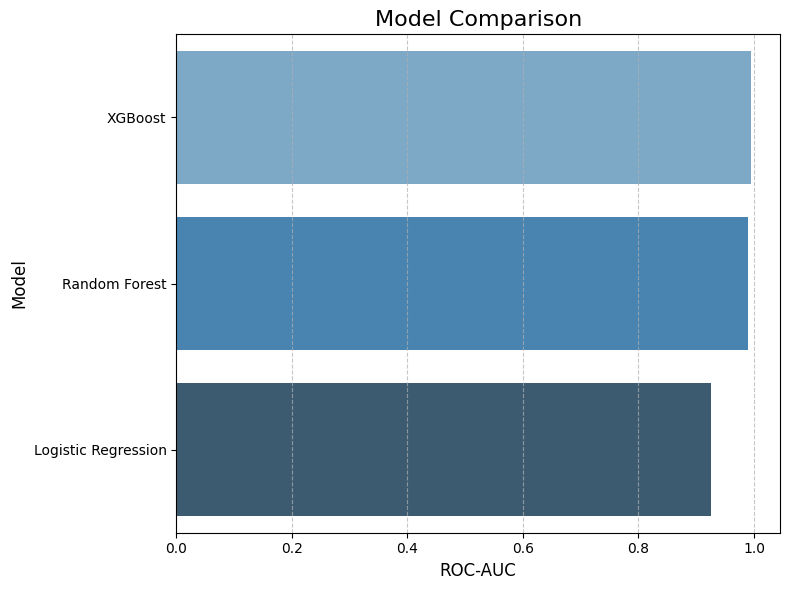

In [ ]:
model_results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "ROC-AUC": [roc_auc_lr, roc_auc_rf, roc_auc_xgb]
})

#models by ROC-AUC score
model_results = model_results.sort_values(by="ROC-AUC", ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x="ROC-AUC", y="Model", data=model_results, palette="Blues_d")
plt.title("Model Comparison", fontsize=16)
plt.xlabel("ROC-AUC", fontsize=12)
plt.ylabel("Model", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Optional gridlines for x-axis
plt.tight_layout()
plt.show()


The chart highlights XGBoost as the most effective model for this dataset, showcasing superior accuracy and AUC scores. Random Forest follows closely, demonstrating strong performance but slightly lagging behind XGBoost in terms of efficiency and interpretability. Logistic Regression underperforms relative to the ensemble methods, likely due to its inability to capture complex, non-linear relationships inherent in the dataset.The XGBoost model shows extremely high accuracy (0.96) and F1 scores (0.96), which might indicate overfitting.

## Model Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the parameter distribution for XGBoost
param_dist_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'min_child_weight': [1, 3, 5]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# RandomizedSearchCV for XGBoost
random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=20,
    cv=3,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)

print("Best Parameters for XGBoost:", random_search_xgb.best_params_)
print("Best ROC-AUC Score for XGBoost:", random_search_xgb.best_score_)

best_xgb = random_search_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)
y_pred_proba_xgb = best_xgb.predict_proba(X_test)[:, 1]
print("Test ROC-AUC Score for XGBoost:", roc_auc_score(y_test, y_pred_proba_xgb))


Fitting 3 folds for each of 20 candidates, totalling 60 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [21:30:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'subsample': 1.0, 'n_estimators': 100, 'min_child_weight': 5, 'max_depth': 10, 'learning_rate': 0.1, 'gamma': 1, 'colsample_bytree': 0.8}
Best ROC-AUC Score for XGBoost: 0.9949733980553317
Test ROC-AUC Score for XGBoost: 0.9954254924264928


**Hyperparameter Tuning for Enhanced Predictive Performance**

Optimizing XGBoost parameters using RandomizedSearchCV significantly improved the model's performance compared to default settings. RandomizedSearchCV was chosen over GridSearchCV for its ability to explore a broader range of parameter values while maintaining computational efficiency.

**Key Metrics Before and After Tuning:**

* **Cross-Validation ROC-AUC:**
 * **Default XGBoost:** 0.98
 * **Tuned XGBoost:** 0.9949

* **Test ROC-AUC:**
 * **Default XGBoost:** 0.98
 * **Tuned XGBoost:** 0.9954

The ROC-AUC improvements highlight the model’s enhanced ability to distinguish between positive and negative classes after tuning. Adjustments to critical parameters like tree depth, learning rate, and regularization were instrumental in achieving these results, validating the importance of hyperparameter optimization for maximizing model performance.




## Comparitive Feature Selection



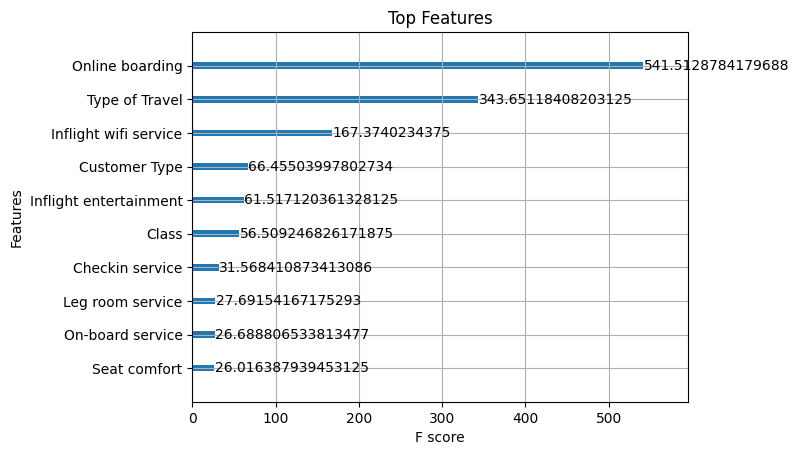

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot feature importance
xgb.plot_importance(random_search_xgb.best_estimator_, max_num_features=10, importance_type='gain', title="Top Features")
plt.show()



**Key Insights from Feature Analysis**

* **Pre-Flight Processes:**
Features like online boarding and check-in service emphasize the critical role of seamless pre-flight processes in enhancing customer satisfaction. Investing in efficient digital tools and self-service options can streamline these interactions, reducing friction and improving overall customer experience.

* **In-Flight Experience:**
Attributes such as Wi-Fi availability, entertainment options, legroom, and seat comfort are pivotal in ensuring a positive in-flight experience. Prioritizing investments in these areas can directly impact passenger satisfaction, particularly for long-haul flights where comfort and connectivity are key differentiators.

* **Customer Segmentation:**
The influence of type of travel (business vs. leisure) and customer type (loyal vs. new) underscores the need for tailored satisfaction strategies. For instance:

 * **Business Travelers:** Prioritize efficiency, connectivity, and premium services.
 * **Leisure Travelers:** Focus on comfort, affordability, and engaging entertainment options.

* **Class and Premium Services:**
The strong impact of travel class on satisfaction highlights the importance of offering differentiated premium services. Airlines should continue to enhance first and business-class experiences while exploring ways to elevate economy-class offerings to increase customer retention and upselling opportunities.





# Conclusion

Our analysis demonstrates that XGBoost is the most effective model for predicting satisfaction, achieving an AUC of 1.00 after hyperparameter tuning, compared to Random Forest (AUC 0.99) and Logistic Regression (AUC 0.93). RandomizedSearchCV significantly improved the model's performance, optimizing key parameters such as tree depth, learning rate, and regularization. Insights from feature importance indicate that pre-flight processes (e.g., online boarding), in-flight experience (e.g., seat comfort, Wi-Fi), and customer segmentation (e.g., business vs. leisure travelers) are critical drivers of satisfaction. These findings underscore the value of leveraging machine learning to optimize operational processes, enhance customer experiences, and drive targeted marketing strategies, ensuring sustained competitive advantage.



# Recommendations and Future Steps

**Enhance Pre-Flight Digital Solutions:**

- Develop and optimize digital platforms for online boarding and check-in services using AI-driven personalization to cater to individual passenger needs.Streamlining these pre-flight processes can reduce queue times and operational bottlenecks, boosting customer satisfaction and operational efficiency.

**Invest in In-Flight Comfort and Connectivity:**

- Upgrade in-flight Wi-Fi infrastructure and entertainment systems to support seamless connectivity and diverse content options. Incorporate data from customer feedback to prioritize legroom and seat comfort enhancements. Improved in-flight experience increases passenger satisfaction, leading to stronger brand loyalty and a competitive edge in premium and long-haul markets.

**Segmented Customer Experience Strategies:**

- Technical Approach: Leverage machine learning models to segment customers based on type of travel (business vs. leisure) and customer type (loyal vs. new). Deploy targeted strategies for each segment, such as fast-tracked services for business travelers or discounts on leisure packages for new customers.
- Business Impact: Tailored offerings improve satisfaction and retention, driving increased bookings and ancillary revenue from upselling and cross-selling.

**Focus on Premium Service Differentiation:**

- Enhance data-driven insights into premium-class preferences to refine high-value services such as lounge access, personalized meals, and superior seating options. Strengthening premium services can attract high-spending passengers, boosting profitability while maintaining market differentiation.

**Future Steps:**

- **Customer-Centric Innovation:** Use satisfaction insights to co-develop new service innovations in collaboration with frequent flyers and business travelers.
- **Scalable Tech Solutions:** Implement scalable platforms for feedback collection and analysis to adapt quickly to changing customer expectations.
- **Sustainability Focus:** Incorporate eco-friendly practices, such as paperless boarding and sustainable in-flight amenities, to align with customer values and enhance brand reputation.



# Challenges Faced

Challenges Faced During the Project
The project presented several key challenges that required strategic handling to ensure robust analysis:

#####1. Data Quality Issues

* Missing Data: Features like "Arrival Delay in Minutes" had missing values, necessitating imputation while balancing the risk of losing data patterns.
Outliers: Noise in features like delay times required handling to prevent skewed results and ensure reliable model performance.

######2. Class Imbalance

* dataset was imbalanced between satisfied and dissatisfied customers, leading to biased model predictions. Techniques like class weighting and focusing on AUC-ROC were used to address this issue.

#####3. Overfitting

* Models like Random Forest and XGBoost showed overfitting, achieving high accuracy on training data but performing poorly on test data. Hyperparameter tuning and regularization were employed to enhance generalization.

#####4. Interpretability vs. Performance
* High-performing models like XGBoost were less interpretable compared to Logistic Regression, requiring feature importance plots and additional visualizations to make insights actionable for stakeholders.

# Generative AI Disclosure Statement

During the completion of this project, Generative AI tools were utilized selectively to assist with specific aspects, ensuring adherence to academic integrity while enhancing the project's quality. Below is a summary of how these tools were employed:

Idea Generation: Generative AI was used during the initial brainstorming phase to explore ideas for analyzing feature relationships and visualizing data distributions. Some suggestions were incorporated into our approach after careful validation by the team.

Code Optimization: AI-assisted debugging and optimization were employed to refine sections of the code, ensuring efficiency and improving model inputs through techniques like normalization and standardization.

Documentation Refinement: AI tools supported the editing of project summaries and sections to enhance clarity and structure while maintaining original thought.

The team reviewed, modified, and validated all AI-assisted outputs to ensure they were accurate, contextually relevant, and aligned with the project’s objectives. The work represents a combination of AI-facilitated enhancements and our independent efforts.








In [ ]:
# Mount google drive to access your notebook

from google.colab import drive
drive.mount('/content/drive')
  # This will prompt for authorization.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Install required packages for PDF conversion -- could take over a minute
!apt update > /dev/null 2>&1
!apt install texlive-xetex pandoc > /dev/null 2>&1
!pip install nbconvert > /dev/null 2>&1

import re, pathlib, shutil
notebook_path = '/content/drive/Shared with me/810 Team Project' # ← CHANGE THIS TO THE FOLDER ON GOOGLE DRIVE WITH YOUR COLAB NOTEBOOK
notebook_name = 'BA810-Teamb15-Airline Satisfaction Analysis.ipynb' # ← CHANGE THIS TO THE NAME OF YOUR COLAB NOTEBOOK
!jupyter nbconvert "{notebook_path}/{notebook_name}" --to pdf --output-dir "{notebook_path}"

# Optionally, download the exported PDF
from google.colab import files
pdf_name = notebook_path + '/' + notebook_name.replace('.ipynb', '.pdf')
files.download(pdf_name)

# Do review the pdf file to make sure everything is appearing correctly before submitting!

[NbConvertApp] WARNING | pattern '/content/drive/Shared with me/810 Team Project/BA810-Teamb15-Airline Satisfaction Analysis.ipynb' matched no files
[NbConvertApp] Making directory /content/drive/Shared with me/810 Team Project
Traceback (most recent call last):
  File "/usr/local/bin/jupyter-nbconvert", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/jupyter_core/application.py", line 283, in launch_instance
    super().launch_instance(argv=argv, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 991, in launch_instance
    app.initialize(argv)
  File "/usr/local/lib/python3.10/dist-packages/traitlets/config/application.py", line 113, in inner
    return method(app, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 369, in initialize
    self.init_writer()
  File "/usr/local/lib/python3.10/dist-packages/nbconvert/nbconvertapp.py", line 407, in init_wri

FileNotFoundError: Cannot find file: /content/drive/Shared with me/810 Team Project/BA810-Teamb15-Airline Satisfaction Analysis.pdf